# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy`

Considere una cruz simétrica inscrita en un círculo de radio $r$

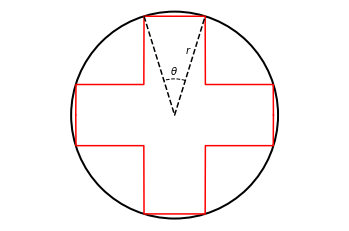

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y = np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(0.1,0.6,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([-st,0,st],[ct,0,ct],'k--')
plt.text(-0.04,0.4,r'$\theta$')
a = patches.Arc((0, 0),0.7,0.7,90,theta1=-0.3*180/np.pi,theta2=0.3*180/np.pi,
                fc='w',color='k',ls='--')
ax.add_artist(a)

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $\theta$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$.
3. ¿Cuál es el área máxima de la cruz?

**Pista:** Divida la cruz en cuatro partes iguales determinadas por los ejes $x$ y $y$. El resto es trigonometría básica.

# Respuesta ->

#### Lo que primero se realizó para encontrar el área total de la cruza mostrada, fue separar los 4 cuadrados y determinar las áreas de cada uno de ellos.
Sabemos que nuestra área es representada de esta manera 
$ A_C(x,y) = 16xy $

Podemos definir también que existe una restricción que es el círculo mostrado en la gráfica. Entonces representamos esta misma restricción de la siguiente manera: 
Restricción : $ f(x) :x^2 + y^2 - 4 $

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline 

x = sp.var("x")
y = sp.var("y")

def cruz_res(x, y, r) :
    return x**2 + y**2 - r**2 

cruz_res(x, y, 2)


x**2 + y**2 - 4

In [21]:

def area_cuadrado(x, y):
    return (64*x*y)
area_cuadrado(x, y)

sol_x = sp.solve(cruz_res(x, y, 2), x)[1]
sol_x # Escogemos nuestro valor positivo, en este caso es el de la derecha 


sqrt(4 - y**2)

In [ ]:
# Maximizamos nuestra función


---
# Segundo punto. Programación lineal

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia?

---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles 

In [24]:
import numpy as np
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x=np.arange(8,29)

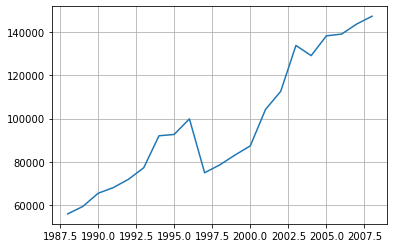

In [25]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación (esto es, obtener un punto medio) y la extrapolación  (es decir, obtener un dato fuera del rango conocido)?

## Resultado 

Podemos representar de 3 maneras distintas los salarios. Nuestro primr rsultado o polinomio 

### Primer polinomio

In [34]:
import scipy.optimize as opt
data = 21
def funcion_prin(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, -1])
    pred = X @ beta 
    funcion_prin = (y - pred).T @ (y- pred)
    return funcion_prin[0][0]

ones = np.ones((data, 1))
x1 = np.reshape(x, [data, -1])
X = np.hstack((ones, x1))
y = np.reshape(y,[data, -1])
beta_1 = np.random.rand(2)
funcion_prin(beta_1, X, y)
solu = opt.minimize(funcion_prin, beta_1, args=(X, y))
solu


      fun: 2247933172.610581
 hess_inv: array([[ 0.12581014, -0.00635802],
       [-0.00635802,  0.00038743]])
      jac: array([ 0., 32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 119
      nit: 6
     njev: 36
   status: 2
  success: False
        x: array([16475.47847756,  4520.31470192])

### Segundo polinomio 

In [35]:
import scipy.optimize as opt
data = 21
def funcion_prin(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, -1])
    pred = X @ beta 
    funcion_prin = (y - pred).T @ (y- pred)
    return funcion_prin[0][0]

ones = np.ones((data, 1))
x1 = np.reshape(x, [data, -1])
x2 = np.reshape(x**2, [data, -1])
X = np.hstack((ones, x1, x2))
y = np.reshape(y, [data, -1])

beta_2 = np.random.rand(3)
funcion_prin(beta_2, X, y)
solu2 = opt.minimize(funcion_prin, beta_2, args=(X,y))
solu2

      fun: 1818616347.0547805
 hess_inv: array([[ 2.70509505e+00, -3.18970126e-01,  8.48646476e-03],
       [-3.18970126e-01,  3.88354744e-02, -1.05426691e-03],
       [ 8.48646476e-03, -1.05426691e-03,  2.91023755e-05]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 9
     njev: 15
   status: 0
  success: True
        x: array([56225.02178849,  -459.96130739,   138.34190442])

### Tercer polinomio

In [36]:
data = 21
def funcion_prin(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, -1])
    pred = X @ beta 
    funcion_prin = (y - pred).T @ (y- pred)
    return funcion_prin[0][0]

ones = np.ones((data, 1))
x1 = np.reshape(x, [data, -1])
x2 = np.reshape(x**2, [data, -1])
x3 = np.reshape(x**3, [data, -1])
X = np.hstack((ones, x1, x2, x3))
y = np.reshape(y, [data, -1])

beta_3 = np.random.rand(4)
funcion_prin(beta_3, X, y)
solu3 = opt.minimize(funcion_prin, beta_3, args=(X,y))
solu3

      fun: 1746809951.9491992
 hess_inv: array([[ 4.61608871e-06, -1.71883461e-10, -4.81188561e-06,
         1.95975882e-07],
       [-1.71883461e-10,  1.89515958e-10, -1.80500109e-11,
         4.17513403e-13],
       [-4.81188561e-06, -1.80500109e-11,  5.01654475e-06,
        -2.04641158e-07],
       [ 1.95975882e-07,  4.17513403e-13, -2.04641158e-07,
         8.66485999e-09]])
      jac: array([     0.,   -112.,  -1056., -26304.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 165
      nit: 11
     njev: 33
   status: 2
  success: False
        x: array([6433.16318118, 9248.42402075, -440.17436372,   10.71328743])

### Graficamos nuestros polinomios para ver las aproximaciones 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

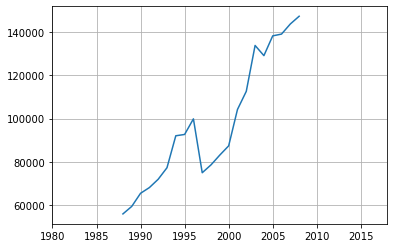

In [45]:
plt.plot(x+1980,y)
plt.grid()
plt.xlim(1980, 2018)

y_poli1 = x1 @ solu.x
y_poli2 = x2 @ solu1.x
y_poli3 = x3 @ solu2.x
plt.plot(x, y_poli1, "b")
plt.plot(x, y_poli2, "r")
plt.plot(x, y_poli1, "g")


In [39]:
x1

array([[ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28]])